In [6]:
#import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [7]:
# Reading the data 
path= "/Users/prithviraj/Downloads/winemag-data-130k-v2.csv"
df =pd.read_csv(path)

In [6]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
print(df.columns)
df
df['description'].values[0]
df.shape

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


(129971, 14)

## Quick EDA 

In [9]:
#lets see how the price is distributed.
df['points'].value_counts()

df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
pip install wordcloud

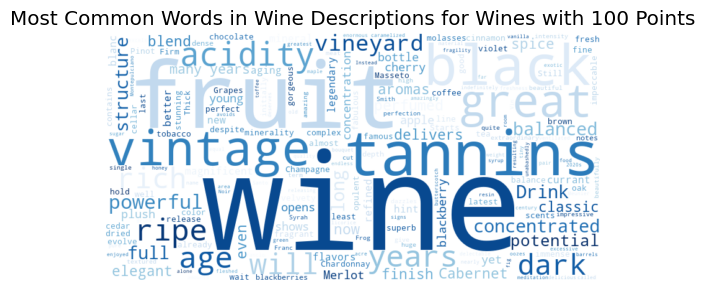

In [9]:
#lets build a wordcloud out of this
cc= df[df['points']==100]['description']
txt= " ".join(cc)

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', colormap='Blues', width=800, height=400).generate(txt)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Wine Descriptions for Wines with 100 Points')
plt.show()

# Some NLTK stuff.

In [10]:
eg=df['description'].iloc[67]
print( eg )

#tokenising
import nltk
nltk.download('punkt')
token = nltk.word_tokenize(eg)
print(token)


A blend of Merlot and Cabernet Franc, this wine brings disjointed lightly volatile aromas of wood spice, vanilla and cherry. The plump cherry flavors are rounded out by woody barrel notes.
['A', 'blend', 'of', 'Merlot', 'and', 'Cabernet', 'Franc', ',', 'this', 'wine', 'brings', 'disjointed', 'lightly', 'volatile', 'aromas', 'of', 'wood', 'spice', ',', 'vanilla', 'and', 'cherry', '.', 'The', 'plump', 'cherry', 'flavors', 'are', 'rounded', 'out', 'by', 'woody', 'barrel', 'notes', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prithviraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#nltk also does the tagging part too
import nltk
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(token)
print(tagged)


[('A', 'DT'), ('blend', 'NN'), ('of', 'IN'), ('Merlot', 'NNP'), ('and', 'CC'), ('Cabernet', 'NNP'), ('Franc', 'NNP'), (',', ','), ('this', 'DT'), ('wine', 'JJ'), ('brings', 'NNS'), ('disjointed', 'VBN'), ('lightly', 'RB'), ('volatile', 'JJ'), ('aromas', 'NN'), ('of', 'IN'), ('wood', 'NN'), ('spice', 'NN'), (',', ','), ('vanilla', 'NN'), ('and', 'CC'), ('cherry', 'NN'), ('.', '.'), ('The', 'DT'), ('plump', 'NN'), ('cherry', 'NN'), ('flavors', 'NNS'), ('are', 'VBP'), ('rounded', 'VBN'), ('out', 'RP'), ('by', 'IN'), ('woody', 'NN'), ('barrel', 'NN'), ('notes', 'NNS'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prithviraj/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [74]:
#these taged parts can be formed into a group of chunks and classified accordingly/
entities= nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  A/DT
  blend/NN
  of/IN
  (ORGANIZATION Merlot/NNP)
  and/CC
  (ORGANIZATION Cabernet/NNP Franc/NNP)
  ,/,
  this/DT
  wine/JJ
  brings/NNS
  disjointed/VBN
  lightly/RB
  volatile/JJ
  aromas/NN
  of/IN
  wood/NN
  spice/NN
  ,/,
  vanilla/NN
  and/CC
  cherry/NN
  ./.
  The/DT
  plump/NN
  cherry/NN
  flavors/NNS
  are/VBP
  rounded/VBN
  out/RP
  by/IN
  woody/NN
  barrel/NN
  notes/NNS
  ./.)


# Step 1 : VADER Sentiment Scoring.##

 
 VADER (Valence Aware Dictionary and Sentiment Reasoner) is a rule-based sentiment analysis tool that is specifically designed to handle sentiment analysis of social media texts. 


In [46]:
#lets do some sentimental analysis using this vader.
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

#define an sentinental intensity analyser
sia=SentimentIntensityAnalyzer()

sia
#done


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prithviraj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
#ok lets test this sia with some examples shall we?
sia.polarity_scores('I am so happy')


{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

#basically this means
negative = 0%
neutral = 0%
positive = ~ 66%
compound = ~62%


In [48]:
#lets try this in our example
sia.polarity_scores(eg)

{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'compound': -0.3182}

In [49]:
a=df.index
a

RangeIndex(start=0, stop=129971, step=1)

In [ ]:
# Define a function to get the sentiment score for each description
def get_sentiment_score(descripton):
    sentiment_scores =sia.polarity_scores(descripton)
    return sentiment_scores

df1= df['description'].apply(get_sentiment_score)



In [50]:
#lets put this into a data frame
def get_sentiment_score(descripton):
    sentiment_scores =sia.polarity_scores(descripton)
    return {
        'positive': sentiment_scores['pos'],
        'negative': sentiment_scores['neg'],
        'neutral': sentiment_scores['neu'],
        'compound': sentiment_scores['compound']
    }

ss = df['description'].apply(get_sentiment_score)


In [30]:
ss

0         {'positive': 0.065, 'negative': 0.0, 'neutral'...
1         {'positive': 0.132, 'negative': 0.0, 'neutral'...
2         {'positive': 0.0, 'negative': 0.053, 'neutral'...
3         {'positive': 0.074, 'negative': 0.0, 'neutral'...
4         {'positive': 0.195, 'negative': 0.0, 'neutral'...
                                ...                        
129966    {'positive': 0.166, 'negative': 0.0, 'neutral'...
129967    {'positive': 0.086, 'negative': 0.0, 'neutral'...
129968    {'positive': 0.063, 'negative': 0.072, 'neutra...
129969    {'positive': 0.109, 'negative': 0.0, 'neutral'...
129970    {'positive': 0.23, 'negative': 0.047, 'neutral...
Name: description, Length: 129971, dtype: object

In [51]:
df2=df
df2[['Vader_positive', 'Vader_negative', 'Vader_neutral', 'Vader_compound']] = df['description'].apply(get_sentiment_score).apply(pd.Series)


In [20]:
df2 = df2.drop(columns=['Vader_positive', 'Vader_negative', 'Vader_neutral', 'Vader_compound'])
df2

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [21]:
#now we have our sentiment score and out metadata
vaders = df2
vaders.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Step 2:Plot VADER results


Text(0.5, 1.0, 'Compound Score by Wine Reviews Dataset')

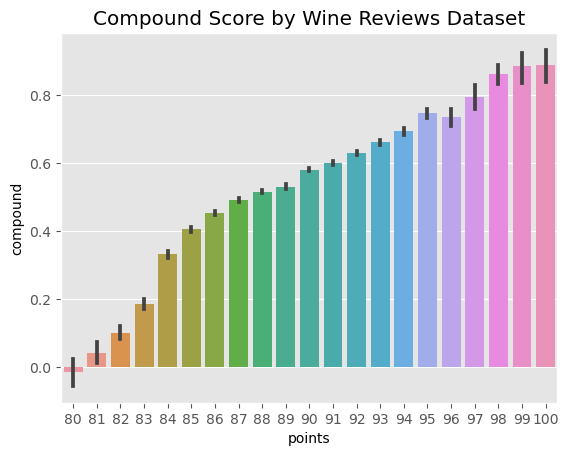

In [156]:
ax = sns.barplot(data=vaders,x='points',y='compound')
ax.set_title('Compound Score by Wine Reviews Dataset')

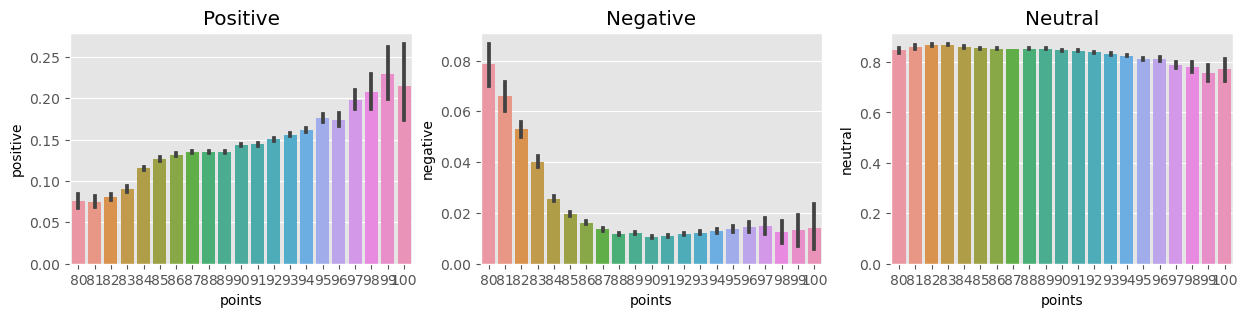

<Figure size 640x480 with 0 Axes>

In [167]:
fig, axs=plt.subplots(nrows=1,ncols=3, figsize=(15,3))
sns.barplot(data=vaders, x='points', y='positive', ax=axs[0])
sns.barplot(data=vaders, x='points', y='negative', ax=axs[1])
sns.barplot(data=vaders, x='points', y='neutral', ax=axs[2])
#sns.barplot(data=vaders, x='points', y='compound', ax=axs[3])

axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
#axs[3].set_title('Compound')

plt.show()
plt.tight_layout()

Based on the bar plot obtained, it appears that there is a generally positive sentiment associated with the wine reviews, as the majority of the bars are skewed towards higher compound scores. Additionally, it seems that the sentiment is somewhat positively correlated with wine ratings, as the bars generally increase in height with higher ratings. However, there is some variability in sentiment across different ratings, as seen by the height of the bars varying even within the same rating category. Overall, the plot provides an informative visualization of the relationship between wine ratings and sentiment in the wine reviews dataset.

# Step 3: Using Hunging Face pre-trained library

Hugging Face is an open-source library for natural language processing (NLP), which provides easy access to pre-trained state-of-the-art models for various NLP tasks, including sentiment analysis, text classification, machine translation, and question answering, among others. The library is built on top of PyTorch and TensorFlow and provides a high-level API for working with these models.

Using Roberta Pretrained model

RoBERTa is a pre-trained transformer model. It is based on the transformer architecture and specifically utilizes the transformer's self-attention mechanism. RoBERTa is trained on a large corpus of text data using a masked language modeling objective, similar to BERT.

In [52]:
#pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [53]:
#now lets pull a very specfic model that has be pre-trained model provided by hugging face library.
#this model was used was twitter sentiment analysis so we dont need to train it again, the requirement is already satisfied/.
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [54]:
#VADER results on the defined example i.e., eg
print(eg)
sia.polarity_scores(eg)

A blend of Merlot and Cabernet Franc, this wine brings disjointed lightly volatile aromas of wood spice, vanilla and cherry. The plump cherry flavors are rounded out by woody barrel notes.


{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'compound': -0.3182}

In [55]:
#ok so lets run this roberta model on the example and compare the two outputs.

encoded_text= tokenizer(eg, return_tensors='pt') # tokenising and returning in the form of tensor
output = model(**encoded_text)
scores = output[0][0].detach().numpy() #convert the obtained results into an numpy array
scores = softmax(scores) #get the probablity distribution of the numpy array using softmax

#put the obtained scores into a dictionary.

scores_dict={
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    
}

print(scores_dict)



{'roberta_neg': 0.007910571, 'roberta_neu': 0.51200235, 'roberta_pos': 0.48008707}


In [33]:
#now lets apply this to the entire wines dataset

def polarity_scores_roberta1(example):
    encoded_text= tokenizer(eg, return_tensors='pt') 
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

#put the obtained scores into a dictionary.

    scores_dict={
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    
    } 
    return scores_dict

scores




array([0.00791057, 0.5120023 , 0.4800871 ], dtype=float32)

In [29]:
df2

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Vader_positive,Vader_negative,Vader_neutral,Vader_compound
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.065,0.000,0.935,0.1531
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.132,0.000,0.868,0.6486
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0.000,0.053,0.947,-0.1280
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.074,0.000,0.926,0.3400
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.195,0.000,0.805,0.8176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),0.166,0.000,0.834,0.7331
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,0.086,0.000,0.914,0.5267
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,0.063,0.072,0.865,0.1548
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,0.109,0.000,0.891,0.5267


In [ ]:
def polarity_scores_roberta1(example):
    encoded_text= tokenizer(eg, return_tensors='pt') 
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return{
        'negative' : scores[0],
        'neutral'  : scores[1], 
        'positive' : scores[2]      
    }

df2[['Roberta_negative', 'Roberta_neutral', 'Roberta_positive']] = df2['description'].apply(polarity_scores_roberta1).apply(pd.Series)


In [24]:
#df2.insert(0, 'id', range(0,len(df)))
#df2.reset_index(drop=True,inplace=True)
def polarity_scores_roberta(descripton):
    sentiment_scores =sia.polarity_scores(descripton)
    return {
        'positive': sentiment_scores['pos'],
        'negative': sentiment_scores['neg'],
        'neutral': sentiment_scores['neu'],
        'compound': sentiment_scores['compound']
    }


df2[['Roberta_positive', 'Roberta_negative', 'neutral', 'compound']] = df['description'].apply(get_sentiment_score).apply(pd.Series)




In [ ]:
%pip install torchvision
import torch
import torchvision

In [26]:
def polarity_scores_roberta_batch(descriptions):
    encoded_texts = tokenizer.batch_encode_plus(descriptions, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**encoded_texts)
        scores = outputs.logits
        scores = torch.softmax(scores, dim=1).tolist()
    return {
        'negative': [score[0] for score in scores],
        'neutral': [score[1] for score in scores],
        'positive': [score[2] for score in scores]
    }



In [ ]:
%pip install -n base -c conda-forge jupyterlab_widgets
%pip install -n pyenv -c conda-forge ipywidgets

In [ ]:
%pip install ipywidgets --user

In [ ]:
%pip install torch
%pip install transformers


In [27]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification


In [28]:
model_name = 'roberta-base'  # Change to the appropriate RoBERTa model name if needed
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [36]:
model_name = 'roberta-base'  # Change to the appropriate RoBERTa model name if needed
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
def get_sentiment_scores(description):
    encoded_inputs = tokenizer(description, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        logits = model(**encoded_inputs).logits
        probabilities = torch.softmax(logits, dim=1).squeeze()
    return probabilities.tolist()

# Assuming df2 is your DataFrame
sentiment_scores = df2['description'].apply(get_sentiment_scores)

In [56]:
import multiprocessing

def get_sentiment_scores(description):
    encoded_inputs = tokenizer(description, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        logits = model(**encoded_inputs).logits
        probabilities = torch.softmax(logits, dim=1).squeeze()
    return probabilities.tolist()

import random

# Set the number of rows to select
num_rows = 1000 # Adjust this number based on the subset size you desire

# Randomly select rows from the dataset
random_indices = random.sample(range(len(df2)), num_rows)
newdf = df2.iloc[random_indices]

# Apply sentiment analysis on the descriptions of the subset
newdf[['Roberta_negative', 'Roberta_neutral', 'Roberta_positive']] = newdf['description'].apply(get_sentiment_scores).apply(pd.Series)




Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/var/folders/9x/lsvys4sn6v73z3xrt4kbmj7h0000gn/T/ipykernel_82597/838903614.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[['Roberta_negative', 'Roberta_neutral', 'Roberta_positive']] = newdf['description'].apply(get_sentiment_scores).apply(pd.Series)
/var/folders/9x/lsvys4sn6v73z3xrt4kbmj7h0000gn/T/ipykernel_82597/838903614.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [59]:
newdf.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'Vader_positive',
       'Vader_negative', 'Vader_neutral', 'Vader_compound', 'Roberta_negative',
       'Roberta_neutral', 'Roberta_positive'],
      dtype='object')

In [64]:
newdf.value_counts('points')

points
87    136
90    131
88    123
89     94
86     90
91     85
85     76
92     65
84     61
93     36
83     31
94     24
95     18
82     13
96      7
81      6
80      2
97      1
98      1
dtype: int64

# Lets compare both vader and roberta scores on based on the points system

In [74]:
newdf.query('points == 97').sort_values('Roberta_positive', ascending=False)['description'].values[0]

'This is a wine with such a wonderful balance of fresh, lemon acidity and sweetness. Its honeyed texture is cut with a mineral bite that gives opulence and structure at the same time. The wine needs long aging so drink from 2017.'

In [75]:
newdf.query('points == 97').sort_values('Vader_positive', ascending=False)['description'].values[0]

'This is a wine with such a wonderful balance of fresh, lemon acidity and sweetness. Its honeyed texture is cut with a mineral bite that gives opulence and structure at the same time. The wine needs long aging so drink from 2017.'

# THX